In [17]:
import numpy as np
import pandas as pd 

import sklearn 
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

#데이터를 불러옴
wt2=pd.read_csv("종관기상관측_클러스터링(2019)_0119.csv",encoding='euc-kr', index_col = 0)
wt2

,지점명,일시,평균기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%),평균 증기압(hPa),관광객 수
184,제주,2019-01-01,5.6,0.0,7.6,5.3,-1.3,61.1,5.6,31232.0
184,제주,2019-01-02,5.1,NaN,6.2,3.9,-1.8,61.0,5.3,36544.0
184,제주,2019-01-03,5.1,NaN,5.1,2.7,-2.0,60.0,5.3,35124.0
184,제주,2019-01-04,5.8,1.6,4.6,2.0,2.1,78.0,7.2,34701.0
184,제주,2019-01-05,7.0,NaN,5.1,3.2,1.2,67.0,6.7,35357.0
...,...,...,...,...,...,...,...,...,...,...
189,서귀포,2019-12-27,6.5,NaN,4.5,1.6,-0.6,61.0,5.9,NaN
189,서귀포,2019-12-28,7.5,NaN,2.4,1.2,2.0,69.0,7.1,NaN
189,서귀포,2019-12-29,12.8,34.3,7.4,2.4,11.0,89.0,13.4,NaN
189,서귀포,2019-12-30,13.1,NaN,3.3,1.0,11.5,91.0,13.7,NaN


In [18]:
#정보를 봄
wt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 184 to 189
Data columns (total 10 columns):
지점명             1460 non-null object
일시              1460 non-null object
평균기온(°C)        1460 non-null float64
일강수량(mm)        452 non-null float64
최대 풍속(m/s)      1460 non-null float64
평균 풍속(m/s)      1452 non-null float64
평균 이슬점온도(°C)    1460 non-null float64
평균 상대습도(%)      1460 non-null float64
평균 증기압(hPa)     1460 non-null float64
관광객 수           365 non-null float64
dtypes: float64(8), object(2)
memory usage: 125.5+ KB


In [19]:
#데이터요약정보를 봄
wt2.describe()

,평균기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),평균 이슬점온도(°C),평균 상대습도(%),평균 증기압(hPa),관광객 수
count,1460.000000,452.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,365.000000
mean,16.630616,18.604425,6.189726,3.325551,11.628493,74.177808,15.918425,42931.506849
std,7.027369,33.401371,3.303701,2.185426,8.945096,14.791309,8.822016,23268.377108
min,1.900000,0.000000,0.400000,0.100000,-10.100000,18.000000,2.900000,8032.000000
25%,10.300000,0.800000,4.000000,1.900000,3.600000,63.750000,8.000000,39079.000000
50%,17.300000,3.850000,5.300000,2.700000,11.650000,74.000000,13.850000,42400.000000
75%,22.600000,20.875000,7.300000,4.100000,19.500000,86.475000,22.725000,45115.000000
max,31.100000,262.700000,26.900000,14.900000,28.500000,100.000000,39.000000,473711.000000


In [20]:
#이상치 제거 

#MAD 기반

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > thresh 


In [21]:
#결측치 처리

#일강수량의 nan을 0으로 대체
wt2['일강수량(mm)'].fillna(0,inplace=True)
wt2

#지점,지점명 컬럼을 제거

wt2.drop(['지점명'],axis='columns',inplace=True)

#nan 인 행을 제거
wt2.dropna(axis=0,inplace=True)

In [22]:
#nan,결측치 확인
wt2.isnull().sum()

일시              0
평균기온(°C)        0
일강수량(mm)        0
최대 풍속(m/s)      0
평균 풍속(m/s)      0
평균 이슬점온도(°C)    0
평균 상대습도(%)      0
평균 증기압(hPa)     0
관광객 수           0
dtype: int64

In [23]:
#x (데이터)를 만듦
x=wt2.iloc[:,1:]
print(x)

     평균기온(°C)  일강수량(mm)  최대 풍속(m/s)  평균 풍속(m/s)  평균 이슬점온도(°C)  평균 상대습도(%)  \
184       5.6       0.0         7.6         5.3          -1.3        61.1   
184       5.1       0.0         6.2         3.9          -1.8        61.0   
184       5.1       0.0         5.1         2.7          -2.0        60.0   
184       5.8       1.6         4.6         2.0           2.1        78.0   
184       7.0       0.0         5.1         3.2           1.2        67.0   
..        ...       ...         ...         ...           ...         ...   
184       6.7       0.0         9.5         5.2          -1.7        55.0   
184       7.7       0.0         4.0         2.0          -0.2        58.0   
184      11.8      11.4         5.9         2.9           8.7        82.0   
184      11.5       0.0         7.7         3.8           7.3        76.0   
184       2.9       0.0        10.0         5.3          -3.8        62.0   

     평균 증기압(hPa)    관광객 수  
184          5.6  31232.0  
184          5.3  3

C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


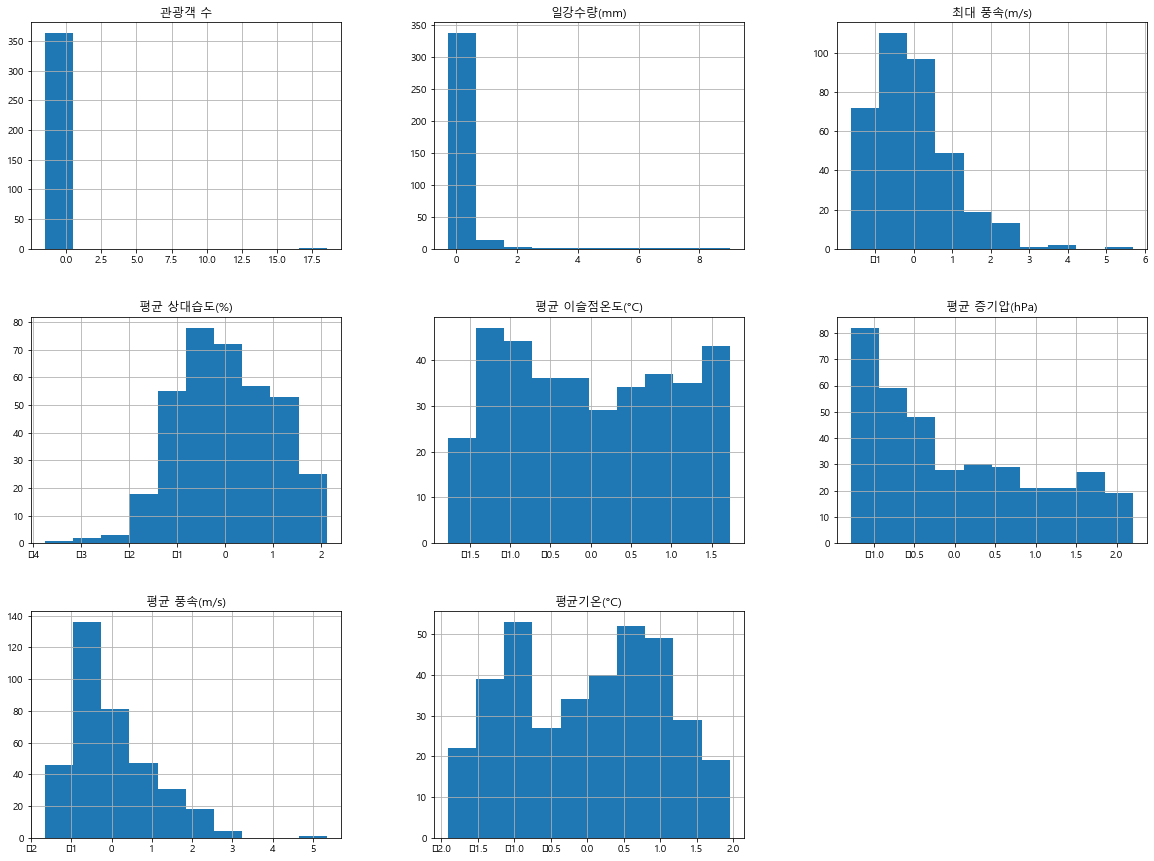

In [24]:
# 정규화중 1. standardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = x.columns)
df.hist( figsize = (20 , 15))
plt.show()

In [25]:
# 정규화중 2 .z-score
import pandas as pd
from sklearn import preprocessing
x= x.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = x.columns)
df.hist( figsize = (20 , 15))
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
               out_file=)